# Краткое описание задания
Перед вами 7 заданий с разным уровнем сложности на основе одного датафрейма.

Зачет будет проходить в формате общения на предмет решенных задач, где будем обсуждать не только полученные ответы, но и путь решения/почему такой ответ мог получиться. 

Для большей части задач визуализация является важным дополнением, без которой возможно получение только неполного балла. Для последней задачи итоговый балл варьируется в зависимости от сложности представленного решения.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px


In [2]:
df = pd.read_csv('final_ff_1.csv', delimiter=';')

In [20]:
df.describe()

,prosmotr,story_id,age,button_tap_flg,like_tap_flg,share_tap_flg,favorite_tap_flg
count,645874.0,645874.000000,645874.000000,645874.000000,645874.000000,645874.000000,645874.000000
mean,1.0,18314.440365,31.958983,0.138999,0.007004,0.002245,0.004538
std,0.0,3130.826341,11.321485,0.357887,0.083399,0.047328,0.067212
min,1.0,5626.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,16850.000000,23.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0,19986.000000,31.000000,0.000000,0.000000,0.000000,0.000000
75%,1.0,20554.000000,38.000000,0.000000,0.000000,0.000000,0.000000
max,1.0,21101.000000,95.000000,6.000000,1.000000,1.000000,1.000000


In [3]:
df.head()

,user_id,date_,prosmotr,story_id,age,device_type,app_or_web,browser,os,gender,geo_country,geo_region,geo_city,day_of_week,user_hour,button_tap_flg,like_tap_flg,share_tap_flg,favorite_tap_flg,name
0,7143ce74749c9d588e3bef0a43260a2cdc5f29ba9e020d...,2022-10-16,1,17281,29,HIGHEND_PHONE,APP,Mobile Safari,iOS,M,RU,MOW,Москва,"6,0","15,0",1,0,0,0,NaN
1,5ab91653f362eb92a4f1c4148aff76c5145f40d3fbd8c7...,2022-10-20,1,11626,24,HIGHEND_PHONE,APP,Mobile Safari,iOS,M,RU,LEN,NaN,"4,0","12,0",0,0,0,0,Ваша карта Tinkoff Black
2,4843a90a104d5b37e2db0c961dafb94c4a0d6ef40254f8...,2022-10-16,1,19778,30,HIGHEND_PHONE,APP,Unknown MIUI Browser,Android,F,RU,ORL,Орёл,"7,0","15,0",0,0,0,0,Ваши письма в прошлое
3,17e7d4120c85e408dbc595ab0b4cb2ab635533ab2b0766...,2022-10-18,1,20879,50,HIGHEND_PHONE,APP,Mobile Safari,iOS,M,RU,TOM,Стрежевой,"2,0","6,0",0,0,0,0,NaN
4,40d07976dfb816a26ee87dc4289dea4e19f8522b3cab67...,2022-10-21,1,20460,19,HIGHEND_PHONE,APP,Unknown Android App,Android,M,RU,IRK,Черемхово,"5,0","11,0",0,0,0,0,NaN


In [23]:
df.dropna().describe()

,prosmotr,story_id,age,button_tap_flg,like_tap_flg,share_tap_flg,favorite_tap_flg
count,320625.0,320625.000000,320625.000000,320625.000000,320625.000000,320625.000000,320625.000000
mean,1.0,17749.258997,32.427699,0.073924,0.005639,0.001132,0.003328
std,0.0,3494.449108,11.026048,0.283690,0.074881,0.033629,0.057592
min,1.0,5775.000000,16.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,14846.000000,24.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0,19375.000000,31.000000,0.000000,0.000000,0.000000,0.000000
75%,1.0,20609.000000,39.000000,0.000000,0.000000,0.000000,0.000000
max,1.0,21090.000000,75.000000,6.000000,1.000000,1.000000,1.000000


## Задание 1 [5 баллов]

* Разбейте пользователей приложения на возрастные группы с интервалом в 5 лет (например, группа пользователей  (20-25] лет).
Выделите среди них возрастную группу, которая стала самой активной (в абсолютных значениях) в репостах сторис. 
В ответе отразите возрастной интервал, а также кол-во репостов сторис
#### Формат ответа:
40-45; 1111

In [8]:
age_range = [x for x in range(15, 80, 5)]
df['age_range'] = pd.cut(df['age'], bins=age_range)

In [17]:
df_1 = df[df['share_tap_flg'] == 1]

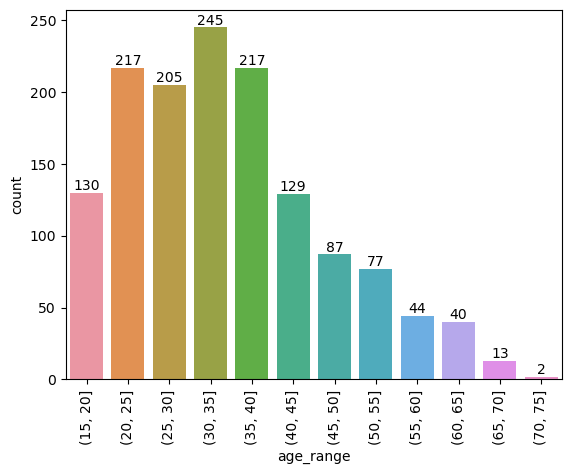

In [24]:
ax = sns.countplot(data=df_1, x='age_range')
ax.bar_label(ax.containers[0])
ax.tick_params(axis='x', labelrotation=90)

In [ ]:
30-35, 245

## Задание 2 [5 баллов]

* Кто чаще ставит лайки сторис: пользователи, которые находятся внутри страны (inside_country),или пользователи за её пределами(outside_country)?
В ответе укажите, кто ставит лайки чаще, а также укажите долю лайков от общего количества показанных сторис для данной группы (округлите проценты до тысячных).
#### Формат ответа:
outside_country; 20.012



In [36]:
df['inside_country'] = np.where(df['geo_country'] == 'RU', True, False)
df_2 = df[df['like_tap_flg'] == 1]

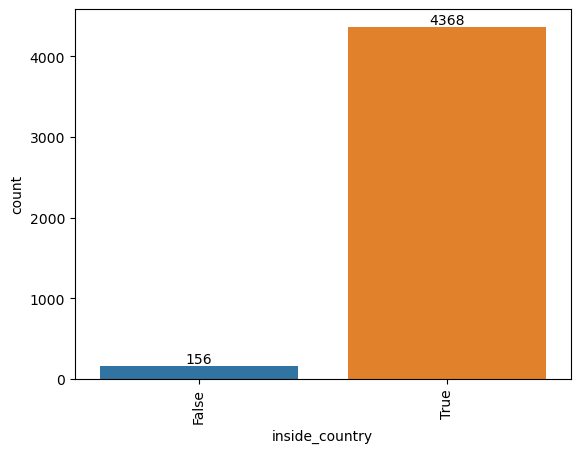

In [26]:
ax = sns.countplot(data=df_2, x='inside_country')
ax.bar_label(ax.containers[0])
ax.tick_params(axis='x', labelrotation=90)

In [ ]:
inside_country

## Задание 3 [5 баллов]

* Назовите краткое название сторис (поле name), которая показала наибольшую конверсию в категорию "любимые" (т.е. были добавлены в закладки пользователями - favorite_tap_flg). При выборе анализируйте только те сторис, которые были показаны более, чем 100 раз.



## Задание 4 [10 баллов] 

* Найдите название истории, в которой в зависимости от региона разброс доли просмотров максимальный и выведите эти топ-три таких регионов




## Задание 5 [10 баллов]

* Постройте распределение клиентов в зависимости от возраста, типа устройства и типа операционной системы 
* Ответьте на вопрос: "Как меняется в зависимости от возраста число клиентов с каждым типом операционной системы и типом устройства?"

## Задание 6 [15 баллов] 

#### Представьте что вы аналитик сторис. 
* Определите категорию клиентов, у которых будет самая большая конверсия в лайк при запуске новой истории по тратам?
* В какие дни эта история будет максимально эффективной и почему?


## Задание 7 [50 баллов] 
* Определите тематики и сгруппируйте сторис по ним.
* Определите топ-5 метрик для каждой тематики, которые будут описывать целевые группы пользователей и их взаимодействие со сторисами из данной группы.


,user_id,date_,prosmotr,story_id,age,device_type,app_or_web,browser,os,gender,geo_country,geo_region,geo_city,day_of_week,user_hour,button_tap_flg,like_tap_flg,share_tap_flg,favorite_tap_flg,name
0,7143ce74749c9d588e3bef0a43260a2cdc5f29ba9e020d...,2022-10-16,1,17281,29,HIGHEND_PHONE,APP,Mobile Safari,iOS,M,RU,MOW,Москва,"6,0","15,0",1,0,0,0,NaN
1,5ab91653f362eb92a4f1c4148aff76c5145f40d3fbd8c7...,2022-10-20,1,11626,24,HIGHEND_PHONE,APP,Mobile Safari,iOS,M,RU,LEN,NaN,"4,0","12,0",0,0,0,0,Ваша карта Tinkoff Black
2,4843a90a104d5b37e2db0c961dafb94c4a0d6ef40254f8...,2022-10-16,1,19778,30,HIGHEND_PHONE,APP,Unknown MIUI Browser,Android,F,RU,ORL,Орёл,"7,0","15,0",0,0,0,0,Ваши письма в прошлое
3,17e7d4120c85e408dbc595ab0b4cb2ab635533ab2b0766...,2022-10-18,1,20879,50,HIGHEND_PHONE,APP,Mobile Safari,iOS,M,RU,TOM,Стрежевой,"2,0","6,0",0,0,0,0,NaN
4,40d07976dfb816a26ee87dc4289dea4e19f8522b3cab67...,2022-10-21,1,20460,19,HIGHEND_PHONE,APP,Unknown Android App,Android,M,RU,IRK,Черемхово,"5,0","11,0",0,0,0,0,NaN
